<a href="https://colab.research.google.com/github/Monika-Monik/AllProjects-/blob/main/Business_Case_Yulu_Hypothesis_Testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import libraries**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns 
%matplotlib inline
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import levene
from scipy.stats import shapiro
from sklearn.preprocessing import scale
from scipy.stats import chi2_contingency
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

**Load data**

In [ ]:
df=pd.read_csv('/content/bike_sharing.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


**INSIGHT:** The file conatins data of object ,integer and float format.

In [ ]:
df.shape # There are 10886 rows and 12 columns

(10886, 12)

In [ ]:
df.sample(2)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
177,2011-01-08 16:00:00,1,0,0,1,7.38,6.82,29,30.0026,8,68,76
4548,2011-11-02 14:00:00,4,0,1,1,20.50,24.24,45,11.0014,40,132,172


**Required check before data analysis**

In [ ]:
total_null = df.isnull().sum().sort_values(ascending = False)
print(f"Total records in (bike_sharing.csv) = {df.shape[0]} where missing values are as follows:")
missing_data = pd.concat([total_null],axis=1,keys=['Total Missing'])
missing_data.head(10)

Total records in (bike_sharing.csv) = 10886 where missing values are as follows:


,Total Missing
datetime,0
season,0
holiday,0
workingday,0
weather,0
temp,0
atemp,0
humidity,0
windspeed,0
casual,0


***Non-Graphical Analysis: Value counts***

In [ ]:
df.value_counts()

datetime             season  holiday  workingday  weather  temp   atemp   humidity  windspeed  casual  registered  count
2011-01-01 00:00:00  1       0        0           1        9.84   14.395  81        0.0000     3       13          16       1
2012-05-01 21:00:00  2       0        1           1        26.24  30.305  65        8.9981     31      251         282      1
2012-05-01 13:00:00  2       0        1           2        29.52  33.335  51        15.0013    41      208         249      1
2012-05-01 14:00:00  2       0        1           2        30.34  33.335  48        16.9979    37      167         204      1
2012-05-01 15:00:00  2       0        1           2        30.34  33.335  45        15.0013    48      186         234      1
                                                                                                                           ..
2011-09-02 04:00:00  3       0        1           1        24.60  28.030  83        6.0032     2       2           4       

**Non-Graphical Analysis: Unique attributes ​​**

In [ ]:
df.nunique()

datetime      10886
season            4
holiday           2
workingday        2
weather           4
temp             49
atemp            60
humidity         89
windspeed        28
casual          309
registered      731
count           822
dtype: int64

**INSIGHT:** No missing value present in the data

**Statistical summary**

In [ ]:
df.describe(exclude='object') 

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


**Correlation among different factors using heat map**

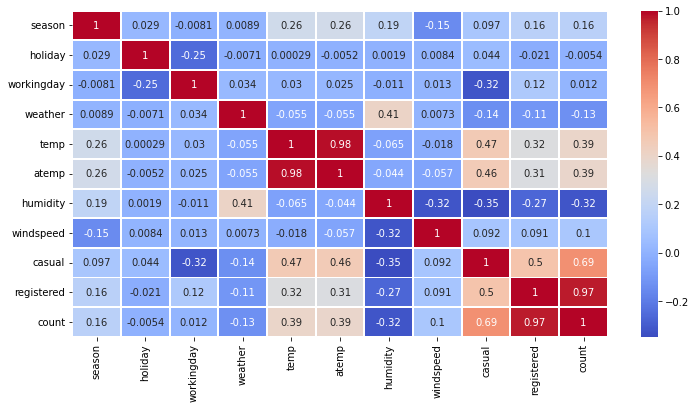

In [ ]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(),cmap='coolwarm',annot=True,linecolor='white',linewidths=1)

In [ ]:
df_yulu=df.copy()

In [ ]:
df_yulu.season.unique()
df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

# **Univariante Analysis**

**Conversion of categorical attributes to 'category'**

In [ ]:
def season(df_yulu):
  if df_yulu['season']== 1:return 'spring'
  elif df_yulu['season']==2:return 'summer'
  elif df_yulu['season']==3:return 'fall'
  else:return 'winter'

df_yulu['season'] = df_yulu.apply(season, axis=1)

In [ ]:
def workingday(df_yulu):
  if df_yulu['workingday']== 1:return 'weekday'
  else:return 'weekend/holiday'
 
df_yulu['workingday'] = df_yulu.apply(workingday, axis=1)

In [ ]:
df_yulu.select_dtypes(include=['object']).columns.tolist()

['datetime', 'season', 'workingday']

In [ ]:
df_yulu.select_dtypes(exclude=['object']).columns.tolist()

['holiday',
 'weather',
 'temp',
 'atemp',
 'humidity',
 'windspeed',
 'casual',
 'registered',
 'count']

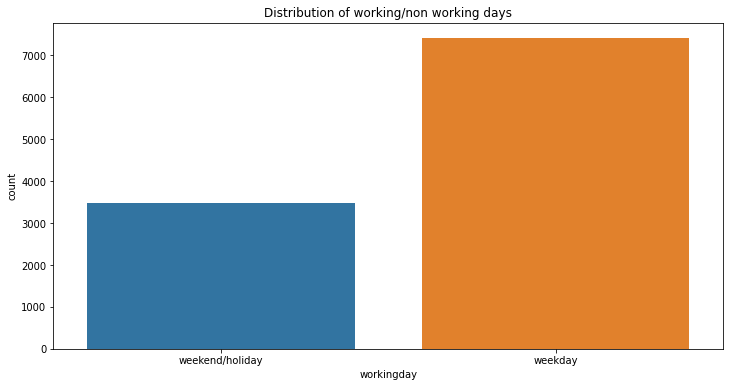

In [ ]:
# count plot on single categorical variable
plt.figure(figsize=(12,6))
plt.title('Distribution of working/non working days')
sns.countplot(x ='workingday', data = df_yulu)
plt.show()


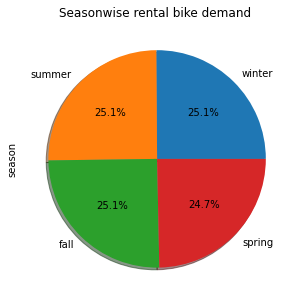

In [ ]:
# count plot on single categorical variable
plt.figure(figsize=(12,5))
plt.title('Seasonwise rental bike demand ')
df_yulu['season'].value_counts().plot.pie(autopct='%1.1f%%',shadow = True)
# Show the plot
plt.show()

** *italicized text*Bivariate Analysis**
(Relationships between important variables such as workday and count, season and count, weather and count)

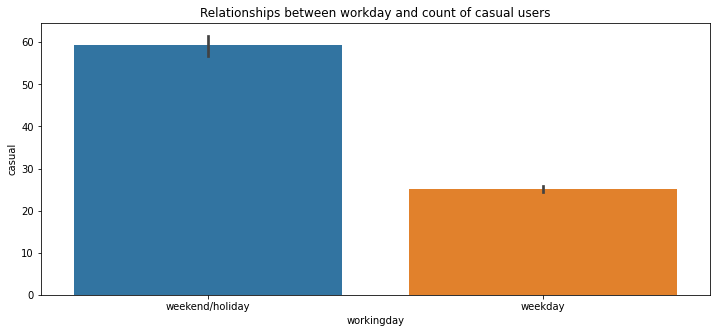

In [ ]:
plt.figure(figsize=(12,5))
plt.title('Relationships between workday and count of casual users')
sns.barplot(x='workingday',y='casual',data=df_yulu)
plt.show()

**INSIGHT:** Casual users prefer to get the rented bikes on weekend/holiday

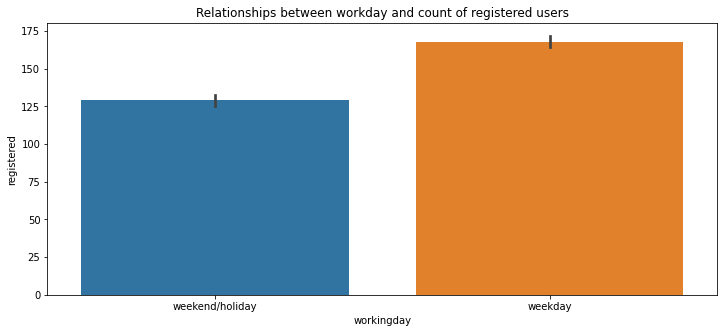

In [ ]:
plt.figure(figsize=(12,5))
plt.title('Relationships between workday and count of registered users')
sns.barplot(x='workingday',y='registered',data=df_yulu)
plt.show()

**INSIGHT:** Registered users prefer to get the rented bikes on weekday.

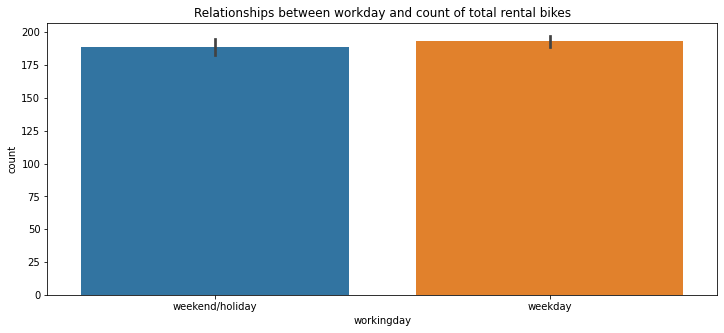

In [ ]:
plt.figure(figsize=(12,5))
plt.title('Relationships between workday and count of total rental bikes')
sns.barplot(x='workingday',y='count',data=df_yulu)
plt.show()

**INSIGHT:** Users prefer to hire a bike on weekdays mostly

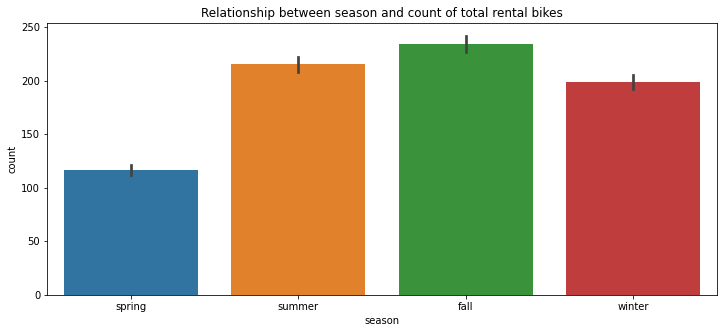

In [ ]:
plt.figure(figsize=(12,5))
plt.title('Relationship between season and count of total rental bikes')
sns.barplot(x='season',y='count',data=df_yulu)
plt.show()

**INSIGHT:** Users prefer to get rented bike in Autumn mostly, followed by summer and winter.Least users prefer rented bikes in spring.

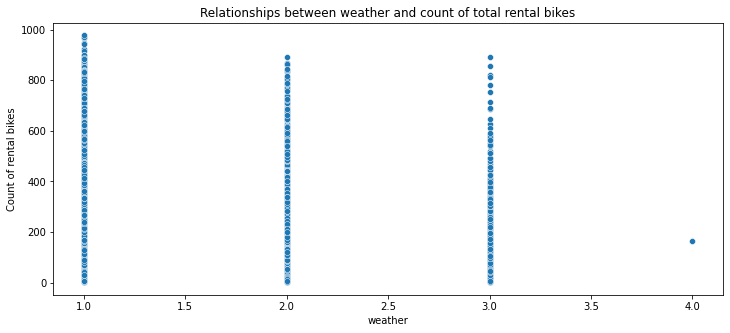

In [ ]:
plt.figure(figsize=(12,5))
plt.title('Relationships between weather and count of total rental bikes')
#'1: Clear, Few clouds, partly cloudy, partly cloudy'
plt.ylabel('Count of rental bikes')
sns.scatterplot(x='weather',y='count',data=df_yulu)
plt.show()

**INSIGHT:** Users prefer to rent bikes in weather with few clouds or partly cloudy or partly cloudy

#**Test on the sample of Working/Non-Working Days' effect on number of electric cycles rented**

In [ ]:
df_working=df[df['workingday']==1]
df_nonworking=df[df['workingday']==0]

In [ ]:
print(df_working.shape,df_nonworking.shape)

(7412, 12) (3474, 12)


In [ ]:
df_working=df_working.sample(3474)
print(df_working.shape,df_nonworking.shape)

(3474, 12) (3474, 12)


#**Levene's test to check whether the variances of the two group are same or not**

Equality of Variance Test:Performing equivalence check by using Levene's test.

The hypothesis of this test are:

Ho - Variances are equal

Ha - Variances are not equal

In [ ]:
alpha=0.05
Stats, p_value = levene(df_working['count'], df_nonworking['count'])
print(f'p value = {p_value}')
if p_value >= alpha:
    print('We fail to reject the Null Hypothesis Ho')
else:
    print('We reject the Null Hypothesis Ho')

p value = 0.922859507676314
We fail to reject the Null Hypothesis Ho


**Insight:** In this case p_value is greater than alpha(0.05).It means that 
variance are equal of working days and non working days.

# **Normality Test:** 
We have taken the difference between samples of demands of rental bikes on working and non working days and scale it to check the normality.

#**Performing normality check using Shapiro-Wilk Test**

The hypothesis of this test are:

Ho - series is normal

Ha - series is not normal

In [ ]:
#Shapiro-Wilk Test
diff_userscount = scale((np.array(df_working['count']) - np.array(df_nonworking['count'])))
stat, p = shapiro(diff_userscount)
print('stat=%.2f, p=%.30f' % (stat, p))

if p > alpha:
    print('Normal distribution/Accept Null Hypothesis')
else:
    print('Not a normal distribution/Reject Null Hypothesis')

stat=0.99, p=0.000000000000007156341661027511
Not a normal distribution/Reject Null Hypothesis


**INSIGHTS:** As the p value which is less than alpha(0.05) then the null hypothesis is rejected i.e. we have sufficient evidence to say that sample does not come from a normal distribution.

# **Q-Q plot**


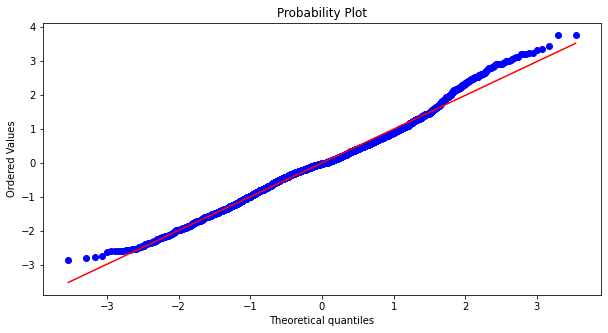

In [ ]:
#q-q plot to check the normality
plt.figure(figsize=(10,5))
stats.probplot(diff_userscount,plot=plt,dist='norm')
plt.show()

**INSIGHT:** Most of the points are on red line but still few points are away from it.We can assume the distribution as normal

# **Histogram plot**


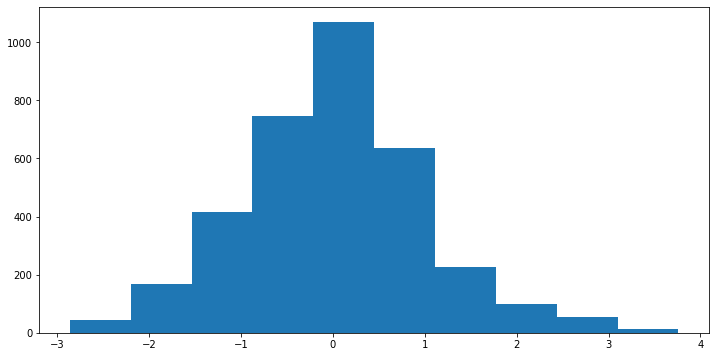

In [ ]:
#Plot histogram to check the normality
diff_userscount = scale((np.array(df_working['count']) - np.array(df_nonworking['count'])))
plt.figure(figsize=(12,6))
plt.hist(diff_userscount)
plt.show()

**INSIGHT:** The distribution is quite close to the normal distribution.

#**2- Sample T-Test:**

Assumptions of data for t-test:

1.Independent.

2.Approximately normally distributed.

3.Having a similar amount of variance within each group being compared.

**NOTE:**
As per the Shapiro wilk test's result ,the residuals are not normally distributed. We should not perform t-test when the assumption is voilated.
But as per the question's requirement ,we have to perform T-Test.


#To check if working day has an effect on the number of electric cycles rented 

In [ ]:
# H0 : Bike rental doesn't depend on workingday
# H1 : Bike rental depends on workingday
# Alpha : 0.05%
from scipy import stats
alpha = 0.05
stats , p_value = stats.ttest_ind(df_working['count'],df_nonworking['count'])
if p_value > alpha:
  print(f'Fail to reject Null Hypothesis p-value is {p_value}')
else:
  print('Reject Null Hypothesis')

Fail to reject Null Hypothesis p-value is 0.45736655541437243


**INSIGHT:** P-value is greater than alpha that is 0.05.It means that we fail to reject null hyposthesis. 
Bike rental doesn't depend on working day.

# **ANNOVA TEST**

#**To check if number of cycles rented is similar or different in different weather: Performing one way annova test**

H0 : There is no difference in the mean

H1 : There is a difference in the mean

In [ ]:
alpha = 0.05
Stats,p_value = stats.f_oneway(df['count'][df['weather']==1],df['count'][df['weather']==2],df['count'][df['weather']==3],df['count'][df['weather']==4])

if p_value > alpha :
  print(' Failed to reject null hypothesis \n No. of cycles rented is similar in different weather \n p-value :',p_value)
else:
  print(' Reject null hypothesis \n No. of cycles rented is different in different weather\n p-value : ',p_value)

 Reject null hypothesis 
 No. of cycles rented is different in different weather
 p-value :  5.482069475935669e-42


**INSIGHT** 
p-value is less than alpha which means that the weather situation impact the number of bike rentals.
Using one way anova we only know that the means of groups(count of users for different weather) are not same.

#**To check if number of cycles rented is similar or different in different season: Performing one way annova test**

In [ ]:
Stats,p_value = stats.f_oneway(df['count'][df['season']==1],df['count'][df['season']==2],df['count'][df['season']==3],df['count'][df['season']==4])

if p_value > alpha :
  print(' Failed to reject null hypothesis \n No. of cycles rented is similar in different seasons \n p-value :',p_value)
else:
  print(' Reject null hypothesis \n No. of cycles rented is different in different seasons \n p-value : ',p_value)

 Reject null hypothesis 
 No. of cycles rented is different in different seasons 
 p-value :  6.164843386499654e-149


**INSIGHT**: 
p-value is less than alpha which means that demand of rental bikes are depend on seasons.

#**Chi-square test to check if weather is dependent on the season**

H0 : Weather is not dependent on Season

H1 : Weather is dependent on Season

Alpha : 0.05%

Comparing two different categorical variables (weather and season)

In [ ]:
#Cross-tabulation analysis
weather_season = pd.crosstab(df['weather'],df['season'])
weather_season

season,1,2,3,4
weather,,,,
1,1759,1801,1930,1702
2,715,708,604,807
3,211,224,199,225
4,1,0,0,0


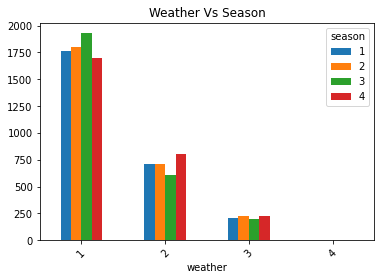

In [ ]:
weather_season.plot(kind = 'bar')
plt.title('Weather Vs Season')
plt.xticks(rotation = 45)
plt.show()

In [ ]:
t_stats, p_value, dof, expected_frequencies  = stats.chi2_contingency(weather_season)
#stat, p, dof, expected
print(f" Chi-square statististics value = {t_stats} \n p-value = {p_value} \n degrees of freedom = {dof} \n Array of expected frequenies = {expected_frequencies}")

 Chi-square statististics value = 49.15865559689363 
 p-value = 1.5499250736864862e-07 
 degrees of freedom = 9 
 Array of expected frequenies = [[1.77454639e+03 1.80559765e+03 1.80559765e+03 1.80625831e+03]
 [6.99258130e+02 7.11493845e+02 7.11493845e+02 7.11754180e+02]
 [2.11948742e+02 2.15657450e+02 2.15657450e+02 2.15736359e+02]
 [2.46738931e-01 2.51056403e-01 2.51056403e-01 2.51148264e-01]]


In [ ]:
stats,p_value,degrees_of_freedom,expected = chi2_contingency(weather_season)
if p_value > alpha:
  print(f' Accept Null Hypothesis\n P-Value = {p_value}\n Weather is not dependent on Season')
else:
  print(f' Reject Null Hypothesis\n P-Value = {p_value}\n Weather is dependent on Season')

 Reject Null Hypothesis
 P-Value = 1.5499250736864862e-07
 Weather is dependent on Season


**INSIGHT**: As p-value is less than alpha which concluded that weather is dependent on Season.


# **Recommendations**

1)Users prefer to get rented bike in fall/Autumn mostly.Least users prefer rented bikes in spring.
 
 Yulu can provide hourwise discount on specific seasons when customers prefer to go out which may increase the demand.



 2)Casual customers' requirement and registered customers' requirement for      rented bike are on different days.

   Yulu should add additional benefits so that this gap of rented bikes on working and non working days can be filled.



 3)Using 2-Sample T-Test,P-value is greater than alpha that is 0.05.It means that we fail to reject the null hyposthesis. 

  Bike rental doesn't depend on working day.Yulu may provide subscription to  the customers on working days to increase 
 the demand rate or special discount in office hours.
 

 4)Using Annova Test,we got that the p-value is less than alpha which means that the weather impact the number of bike  rentals.

 5)Using Annova Test,p-value is less than alpha and rejected the null hypothesis which clearly proved that the demand of rental bikes is dependent on seasons.
	 Yulu should provide offers seasonally .If they provide discount on school holidays or summer vacation then demand may be increased.

 6)Using Chi square test,p-value is less than alpha and rejected the null hypthesis .Then we have concluded that weather is dependent on Season.
 This can be improved by checking the weather forecast before booking for rental bikes.